# #6: Iris dataset classification using decision tree </h1> <br>




# Importing modules

In [1]:
# Data processing
import pandas as pd
import numpy as np

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sb

# For labelling
from sklearn.preprocessing import LabelEncoder

# For splitting dataset in for training and testing
from sklearn.model_selection import train_test_split

# Accuracy score
from sklearn.metrics import accuracy_score 



# Loading dataset

In [2]:
iris1_df = pd.read_csv('Iris1.csv')
iris1_df.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris1_df = iris1_df.drop(columns=['Id'])
iris1_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
iris1_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
iris1_df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
# species count
iris1_df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

# Checking for missing values

In [8]:
iris1_df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# Visualisation

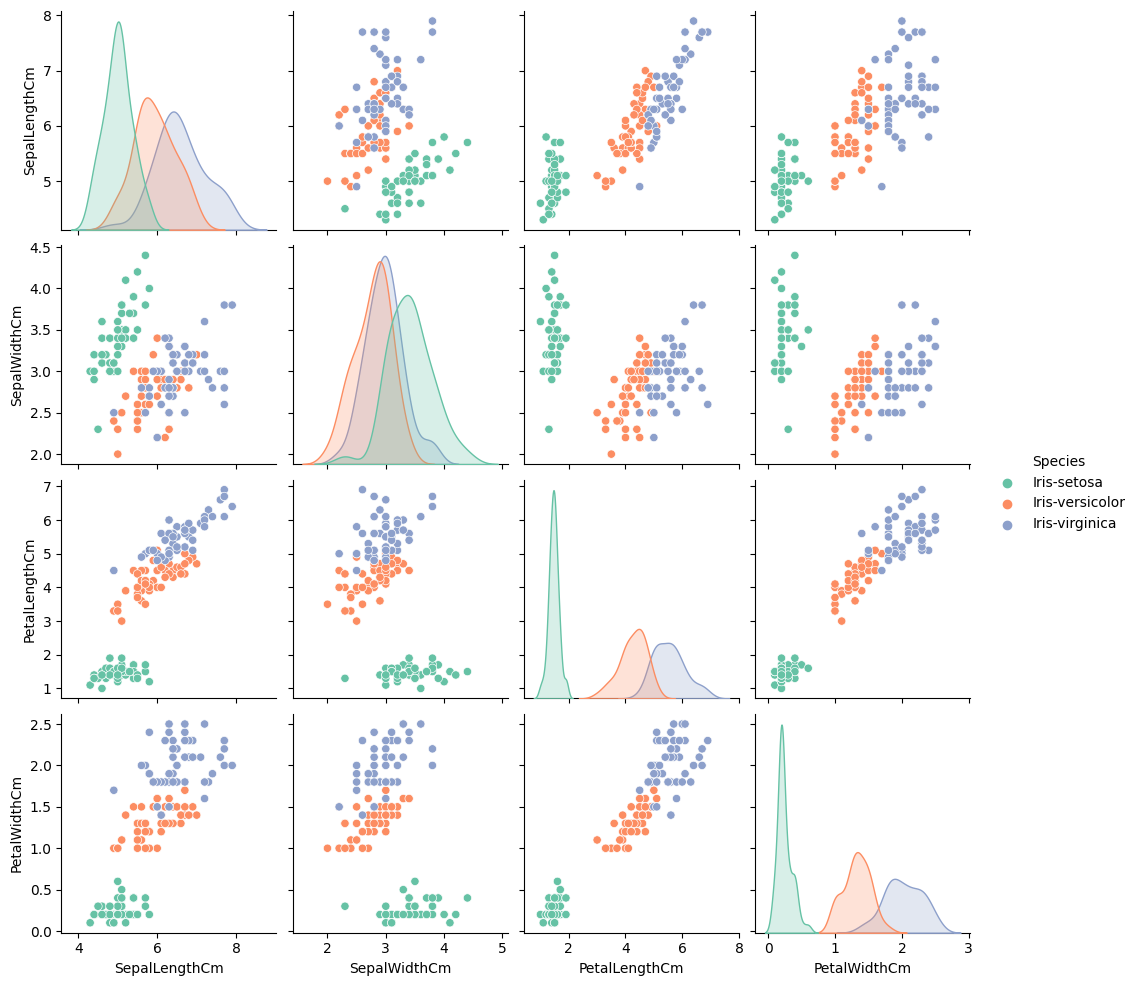

In [12]:
# Visualising bivaritate relationship between each pair of attributes
import seaborn as sns
sns.set_palette('Set2')

b = sns.pairplot(data = iris1_df,hue="Species");
plt.show()

### Inference
+ The relationship between pairs of features of an Iris-Setosa is distinctly different from those of the other two species.
+ There is an overlap in the pairwise relationships of the other two species, Iris-Versicolorand Iris-Virginia.
+ Hence it would be relatively eaiser to classify Iris-Setosa among the three species. However, classification of Iris- Versicolor and Iris-Virginica would be slightly harder.  

# Labelling

In [13]:
label = LabelEncoder()
iris1_df['Species'] = label.fit_transform(iris1_df['Species'])
iris1_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [14]:
iris1_df.tail()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


# Training the model

In [20]:

X = iris1_df.drop(columns=['Species'])
Y = iris1_df['Species']

# 70% of dataset will we used for training and rest 30% will be used for testing 
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3)


In [16]:
# Appying decision tree algorithm on our Dataset

from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

model = model.fit(x_train, y_train)

In [17]:
print("Accuracy: ", model.score(x_test, y_test)*100)

Accuracy:  86.66666666666667


# visualizing Decision tree graph

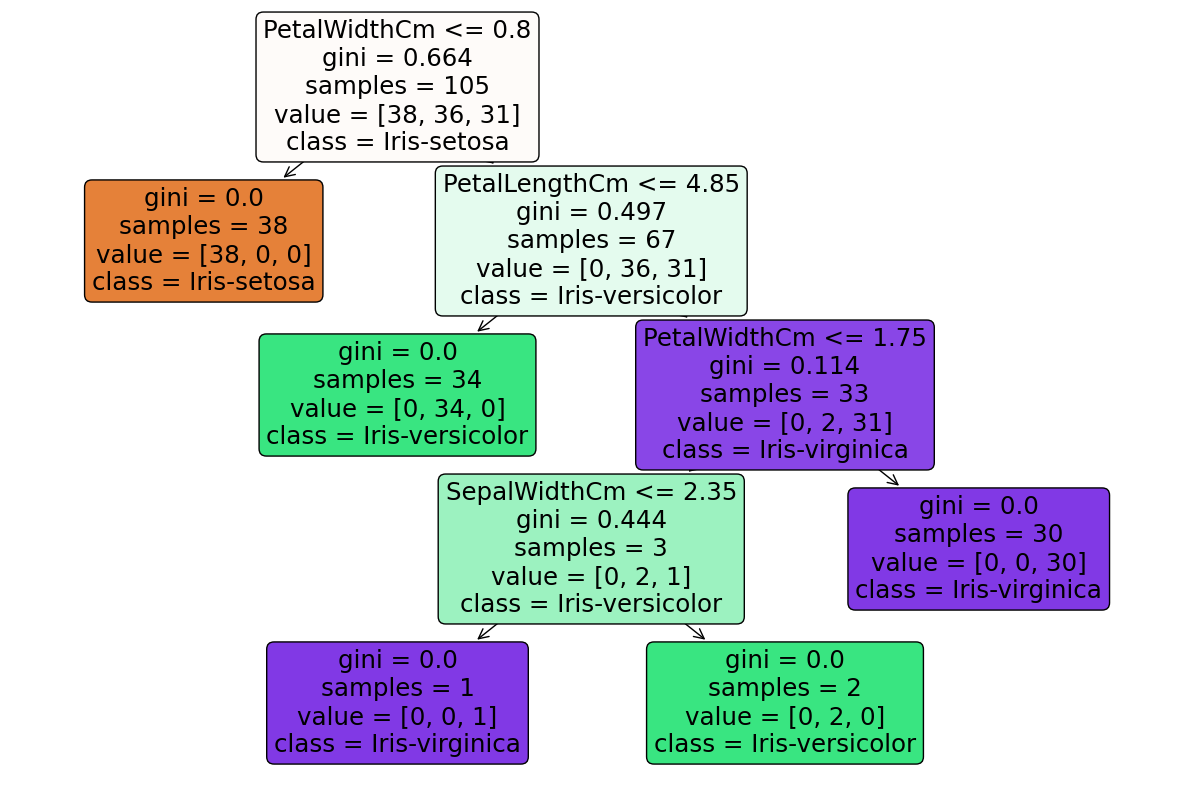

In [21]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(model,
               feature_names = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'],
               class_names = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'],
               filled = True,
              rounded = True)
plt.show()